# Sprawdzenie danych

## Sprawdzenie czy danych nie brakuje

In [2]:
import os

images_dir = 'data/train/images'
labels_dir = 'data/train/labels'

image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

missing_labels = image_files - label_files
missing_images = label_files - image_files

print(f'Brakujące labelki dla obrazów: {len(missing_labels)}')
print(f'Brakujące obrazy dla labeli: {len(missing_images)}')


Brakujące labelki dla obrazów: 0
Brakujące obrazy dla labeli: 0


## Wizualizacja przykładowego zdjęcia treningowego

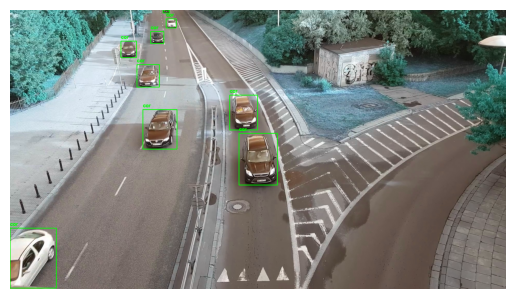

In [42]:
import random
import os
import cv2
import matplotlib.pyplot as plt

# Ścieżki
images_dir = 'data/train/images'
labels_dir = 'data/train/labels'

image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Wylosuj losowy obraz
random_image = random.choice(image_files)
image_path = os.path.join(images_dir, random_image)
label_path = os.path.join(labels_dir, os.path.splitext(random_image)[0] + '.txt')

# Załaduj obraz
img = cv2.imread(image_path)
h, w, _ = img.shape

# Jeśli istnieje label
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            cls, xc, yc, bw, bh = map(float, line.strip().split())
            # YOLO format -> współrzędne prostokąta
            x1 = int((xc - bw / 2) * w)
            y1 = int((yc - bh / 2) * h)
            x2 = int((xc + bw / 2) * w)
            y2 = int((yc + bh / 2) * h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(img, 'car', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# Pokaż
plt.axis('off')
plt.imshow(img)
plt.show()
